In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
df = pd.read_csv("records_final_series_test_final_corrected_v1.csv")

In [3]:
df.head(6)

Player    Country % Team Runs  Mat  Inns  NO  50s  100s  0s    HS  \
0  Bannerman C  Australia      28.63%    2     4   1    0     1   0  165*   
1     Ulyett G    England      21.69%    2     4   0    2     0   0    63   
2       Hill A    England      14.70%    2     4   2    0     0   1    49   
3  Greenwood A    England      11.21%    2     4   0    0     0   0    49   
4     Emmett T    England      10.63%    2     4   0    0     0   0    48   
5       Jupp H    England       9.90%    2     4   0    1     0   1    63   

   Runs    S/R    Avg  Ca  St  Series_Code   H/A   Decade_Index   
0   209  -0.14  69.67   0   0            1  Home               0  
1   149  -0.15  37.25   2   0            1  Away               0  
2   101   -0.1   50.5   1   0            1  Away               0  
3    77  -0.08  19.25   2   0            1  Away               0  
4    73  -0.07  18.25   4   0            1  Away               0  
5    68  -0.07     17   2   0            1  Away               0

In [4]:
series = df[' Decade_Index '].values
print(series)


[ 0  0  0 ..., 13 13 13]


In [5]:
print(df['Series_Code'][1000])

39


In [6]:
indices

NameError: name 'indices' is not defined

In [7]:
number, series_unique = np.unique(series, return_inverse = True)  
print(number)
print(len(series_unique))
print(len(number))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
19848
14


In [8]:
players = df['Player'].values
player_names, player_indices = np.unique(players, return_index = True)
print(player_names)
print(len(player_names))
print(len(player_indices))

["A'Beckett E L" 'Aamer Malik' 'Aamir Nazir' ..., 'van Zyl S'
 'van der Bijl P G V' 'van der Merwe P L']
2876
2876


In [ ]:
# -> filter the players based on decades 
player_dict_temp_2 = {}
for i in range(len(player_names)):
    player_index_arr = []
    for j in range(player_indices[i],len(df.index)):
        if(df['Player'][j] == player_names[i]):
            player_index_arr.append(j)
    player_dict_temp_2[player_names[i]] = player_index_arr

In [ ]:
print(player_dict_temp_2['Aamer Malik'])

In [47]:
# -> filter the players based on decades 

player_dict_temp_3 = {}
for i in df.index:
    if df["Player"][i] in player_dict_temp_3.keys():
        player_dict_temp_3[df["Player"][i]] = player_dict_temp_3[df["Player"][i]] + [i]
    else:
        player_dict_temp_3[df["Player"][i]] = [i]



In [48]:
print(player_dict_temp_3['Aamer Malik'])

[8280, 8421, 8506, 8578, 8665, 8757, 8941, 9962]


In [10]:
# to do -> remove unnecessary dictionaries and instead use series_occurences that we defined later to find the first occurence of every series
trps = dict() #total runs per series
mps = {} # matches per series
arps = {} #average runs per series
sid = {} # series in decade
arpd = np.zeros(14)
tspd = np.zeros(14)
for i in df.index:
    x = df['Series_Code'][i]
    trps[x] = 0
    mps[x] = 0
    #arps[x] = 0
    
    
for i in df.index:
    x = df['Series_Code'][i]
    trps[x] = trps[x] + df['Runs'][i]
    mps[x] = max(mps[x],df['Mat'][i])
    sid[x] = df[' Decade_Index '][i]

for i in trps.keys():
    arps[i] =trps[i]/mps[i]
    
for i in arps.keys():
    arpd[sid[i]]+= arps[i]
    tspd[sid[i]] += 1          
    
arpd = arpd/tspd
w = np.sum(arpd)/arpd
w = w/np.average(w)
print(w)


#print(1,2)
#print(k)


#print(d[1] + d[2])
    

[ 1.37379319  1.02405175  0.99247044  1.06781918  0.94435217  0.97497954
  0.98728066  1.04158059  1.01021959  1.00640846  0.92513837  0.8725503
  0.88792006  0.8914357 ]


arps

In [11]:
df["weighted_runs"]=0.0
df.head()

Player    Country % Team Runs  Mat  Inns  NO  50s  100s  0s    HS  \
0  Bannerman C  Australia      28.63%    2     4   1    0     1   0  165*   
1     Ulyett G    England      21.69%    2     4   0    2     0   0    63   
2       Hill A    England      14.70%    2     4   2    0     0   1    49   
3  Greenwood A    England      11.21%    2     4   0    0     0   0    49   
4     Emmett T    England      10.63%    2     4   0    0     0   0    48   

   Runs    S/R    Avg  Ca  St  Series_Code   H/A   Decade_Index   \
0   209  -0.14  69.67   0   0            1  Home               0   
1   149  -0.15  37.25   2   0            1  Away               0   
2   101   -0.1   50.5   1   0            1  Away               0   
3    77  -0.08  19.25   2   0            1  Away               0   
4    73  -0.07  18.25   4   0            1  Away               0   

   weighted_runs  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [49]:
sum = 0
for i in sid.keys():
    if sid[i] == 0:
        sum = sum + trps[i]
   

In [50]:
sum

45603

In [12]:
for i in range(5):
    df["weighted_runs"][i] = df["Runs"][i]*w[df[" Decade_Index "][i]]

    

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df.tail(100)


Player       Country % Team Runs  Mat  Inns  NO  50s  100s  \
19748          Kumar B         India       8.17%    2     4   1    0     0   
19749       Pujara C A         India       8.09%    3     6   0    1     0   
19750    Philander V D  South Africa       6.81%    3     6   0    0     0   
19751         Ashwin R         India       7.28%    2     4   0    0     0   
19752       Sharma R G         India       6.31%    2     4   0    0     0   
19753         Rabada K  South Africa       5.51%    3     6   0    0     0   
19754      Maharaj K A  South Africa       5.36%    2     4   0    0     0   
19755   Mohammed Shami         India       5.83%    3     6   1    0     0   
19756        de Kock Q  South Africa       5.14%    3     6   0    0     0   
19757       Rahane A M         India       4.61%    1     2   0    0     0   
19758        Patel P A         India       4.53%    2     4   0    0     0   
19759         Dhawan S         India       2.59%    1     2   0    0     0   
19760        Rahul K L         India       2.43%    2     4   0    0     0   
19761         Morkel M  South Africa       2.10%    3     6   2    0     0   
19762        Steyn D W  South Africa       1.16%    1     2   2    0     0   
19763         Sharma I         India       1.13%    2     4   2    0     0   
19764  Phehlukwayo A L  South Africa       0.65%    1     2   0    0     0   
19765         Saha W P         India       0.65%    1     2   0    0     0   
19766          Ngidi L  South Africa       0.43%    2     4   1    0     0   
19767       Bumrah J J         India       0.32%    3     6   2    0     0   
19768    Mominul Haque    Bangladesh      29.82%    2     4   0    0     2   
19769     Mendis B K G     Sri Lanka      23.34%    2     3   0    1     1   
19770      Silva A R S     Sri Lanka      20.24%    2     3   1    2     1   
19771     de Silva D M     Sri Lanka      18.95%    2     3   0    0     1   
19772      Mahmudullah    Bangladesh      12.73%    2     4   2    1     0   
19773        Liton Das    Bangladesh      12.44%    2     4   0    1     0   
19774  Mushfiqur Rahim    Bangladesh      11.40%    2     4   0    1     0   
19775    Chandimal L D     Sri Lanka      10.08%    2     3   0    1     0   
19776      Tamim Iqbal    Bangladesh       9.40%    2     4   0    1     0   
19777      Imrul Kayes    Bangladesh       9.02%    2     4   0    0     0   
...                ...           ...         ...  ...   ...  ..  ...   ...   
19818      Renshaw M T     Australia       0.74%    1     2   0    0     0   
19819         Morkel M  South Africa       0.53%    3     5   1    0     0   
19820          Ngidi L  South Africa       0.20%    1     1   0    0     0   
19821       Sayers C J     Australia         NaN    1     2   0    0     0   
19822     Bairstow J M       England      15.72%    2     4   0    0     1   
19823     Stoneman M D       England      15.53%    2     4   0    2     0   
19824     Nicholls H M   New Zealand      16.44%    2     3   1    0     1   
19825  de Grandhomme C   New Zealand      15.19%    2     3   0    1     0   
19826         Root J E       England      13.69%    2     4   0    2     0   
19827      Watling B J   New Zealand      14.05%    2     3   0    1     0   
19828   Williamson K S   New Zealand      12.90%    2     3   0    0     1   
19829     Latham T W M   New Zealand      11.34%    2     3   0    1     0   
19830       Stokes B A       England       9.93%    2     4   0    1     0   
19831        Vince J M       England       9.06%    1     2   0    1     0   
19832        Malan D J       England       7.52%    2     4   0    1     0   
19833      Southee T G   New Zealand       7.80%    2     2   0    1     0   
19834         Wood M A       England       5.88%    1     2   0    1     0   
19835       Woakes C R       England       5.50%    1     2   0    1     0   
19836        Sodhi I S   New Zealand       5.93%    1     2   1    1     0   
19837         Wagner N   New Zealand  

In [10]:
print(type(0.0))

<class 'float'>


In [14]:
weighted_runs = np.zeros(len(df.index))
for i in df.index:
    #print(i)
    weighted_runs[i] = df["Runs"][i]*w[df[" Decade_Index "][i]]

In [15]:
weighted_runs


array([ 287.12277735,  204.69518576,  138.7531125 , ...,   16.04584257,
         14.26297118,    1.7828714 ])

In [16]:
len(weighted_runs)

19848

In [17]:
runs_metric = []
player_dict_temp_4 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_2[i]:
        runs += weighted_runs[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 40):    
        runs_metric.append(runs/no_of_matches)
        player_dict_temp_4[i] = (runs/no_of_matches)
    
print(player_dict_temp_4)
        

{'Aamir Sohail': 35.607011253358309, 'Abdul Qadir': 15.738413956424148, 'Abdul Razzaq': 25.461275525879959, 'Abid Ali S': 19.525933338109791, 'Adams J C': 41.609055710152212, 'Ali M M': 28.841502935755262, 'Alimuddin': 26.062001676121877, 'Amarnath M': 42.152355384449102, 'Ambrose C E L': 12.605800278718608, 'Ames L E G': 40.261217419515226, 'Amiss D L': 45.099970299175546, 'Amla H M': 42.376320199675291, 'Anderson J M': 8.6888385597908524, 'Armstrong W W': 39.554861996113686, 'Arnold R P': 24.683703357543113, 'Arthurton K L T': 31.098141838767564, 'Asad Shafiq': 35.292098279521852, 'Ashwin R': 27.255667763514698, 'Asif Iqbal': 37.596139067877886, 'Astle N J': 35.765083758317793, 'Atapattu M S': 37.159628577496186, 'Atherton M A': 38.005948049516164, 'Azhar Ali': 41.38191243987351, 'Azharuddin M': 46.139094114840475, 'Bailey T E': 31.757219889958904, 'Bairstow J M': 34.896011017212786, 'Bannerman A C': 31.71172620596937, 'Barber R W': 33.640897583960758, 'Bardsley W': 38.28834838719135

In [1]:
runs_metric = []
player_dict_temp_5= {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_2[i]:
        runs += weighted_runs[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 80):    
        runs_metric.append(runs/no_of_matches)
        player_dict_temp_5[i] = (runs/no_of_matches)
    
print(player_dict_temp_5)
        

NameError: name 'player_names' is not defined

In [18]:
s = [(k,player_dict_temp_4[k]) for k in sorted(player_dict_temp_4, key=player_dict_temp_4.get, reverse = True)]

In [19]:
print(s)

[('Bradman D G', 101.23874065853317), ('Weekes E D C', 62.593874540060057), ('Walcott C L', 60.531003897144771), ('Sutcliffe H', 60.276037911550311), ('Hutton L', 59.6944997414219), ('Hammond W R', 58.241901963870681), ('Hobbs J B', 58.238546271345051), ('Sobers G S A', 57.82277728325969), ('Barrington K F', 56.531396902729036), ('Nourse A D', 55.965221999974446), ('Smith S P D', 54.548593880061844), ('Compton D C S', 53.151403349757459), ('Javed Miandad', 52.689833463949789), ('Chappell G S', 52.623483023631096), ('Worrell F M M', 52.093060080119344), ('Lara B C', 51.305545878559258), ('Harvey R N', 50.988337339882015), ('Waugh S R', 50.935685173925222), ('Flower A', 50.894263299679366), ('Hazare V S', 50.883905467123824), ('Kallis J H', 50.869264933401048), ('Border A R', 50.798571375632605), ('Sangakkara K C', 50.629180831440181), ('Tendulkar S R', 50.565766645812104), ('Gavaskar S M', 50.354883317182654), ('Richards I V A', 50.079039085678808), ('Mitchell B', 49.65688373493321), ('

In [20]:
for k,v in s:
    print(k)

Bradman D G
Weekes E D C
Walcott C L
Sutcliffe H
Hutton L
Hammond W R
Hobbs J B
Sobers G S A
Barrington K F
Nourse A D
Smith S P D
Compton D C S
Javed Miandad
Chappell G S
Worrell F M M
Lara B C
Harvey R N
Waugh S R
Flower A
Hazare V S
Kallis J H
Border A R
Sangakkara K C
Tendulkar S R
Gavaskar S M
Richards I V A
Mitchell B
Morris A R
May P B H
Hassett A L
Mohammad Yousuf
Dravid R
Jones D M
Ponsford W H
McCabe S J
Ponting R T
Kohli V
Hendren E H
Chanderpaul S
Kanhai R B
Inzamam-ul-Haq
Younis Khan
Root J E
Dexter E R
Walters K D
Hayden M L
Azharuddin M
Crowe M D
Boycott G
O'Neill N C
Shoaib Mohammad
Leyland M
Washbrook C
Woodfull W M
Nurse S M
Lloyd C H
Hussey M E K
Rowan E A B
Richardson R B
Jones A H
Hunte C C
Simpson R B
Amiss D L
Stollmeyer J B
de Villiers A B
Pujara C A
Graveney T W
Greenidge C G
Hanif Mohammad
Williamson K S
Saleem Malik
Smith R A
Jayawardene D P M D
Boon D C
Lawry W M
Gower D I
Gilchrist A C
Cowper R M
Taylor M A
Kirsten G
Sehwag V
Cullinan D J
Taylor H W
Hardsta

In [138]:
s1 = [(k,player_dict_temp_4[k]) for k in sorted(player_dict_temp_4, key=player_dict_temp_4.get, reverse = True)]
s1

[('Bradman D G', 101.23874065853317),
 ('Weekes E D C', 62.593874540060057),
 ('Walcott C L', 60.531003897144771),
 ('Sutcliffe H', 60.276037911550311),
 ('Hutton L', 59.6944997414219),
 ('Hammond W R', 58.241901963870681),
 ('Hobbs J B', 58.238546271345051),
 ('Sobers G S A', 57.82277728325969),
 ('Barrington K F', 56.531396902729036),
 ('Nourse A D', 55.965221999974446),
 ('Smith S P D', 54.548593880061844),
 ('Compton D C S', 53.151403349757459),
 ('Javed Miandad', 52.689833463949789),
 ('Chappell G S', 52.623483023631096),
 ('Worrell F M M', 52.093060080119344),
 ('Lara B C', 51.305545878559258),
 ('Harvey R N', 50.988337339882015),
 ('Waugh S R', 50.935685173925222),
 ('Flower A', 50.894263299679366),
 ('Hazare V S', 50.883905467123824),
 ('Kallis J H', 50.869264933401048),
 ('Border A R', 50.798571375632605),
 ('Sangakkara K C', 50.629180831440181),
 ('Tendulkar S R', 50.565766645812104),
 ('Gavaskar S M', 50.354883317182654),
 ('Richards I V A', 50.079039085678808),
 ('Mitchell 

In [22]:
series_codes = df['Series_Code'].values
print(series_codes)

[  1   1   1 ..., 735 735 735]


In [25]:
series_list, series_occurances = np.unique(series_codes, return_index=True)
series_occurances

array([    0,    25,    47,    69,    95,   117,   140,   167,   206,
         232,   260,   282,   310,   336,   361,   386,   408,   436,
         470,   503,   532,   558,   586,   645,   674,   703,   731,
         760,   792,   816,   841,   869,   908,   937,   962,   992,
        1028,  1058,  1101,  1129,  1159,  1196,  1227,  1257,  1289,
        1321,  1355,  1395,  1424,  1464,  1498,  1524,  1557,  1587,
        1619,  1646,  1668,  1701,  1728,  1761,  1792,  1824,  1855,
        1894,  1924,  1958,  1990,  2021,  2052,  2082,  2114,  2136,
        2169,  2199,  2221,  2256,  2290,  2325,  2361,  2394,  2425,
        2458,  2486,  2523,  2553,  2577,  2611,  2649,  2682,  2707,
        2737,  2777,  2805,  2836,  2863,  2896,  2923,  2956,  2991,
        3023,  3050,  3075,  3109,  3148,  3177,  3212,  3246,  3281,
        3303,  3333,  3361,  3393,  3422,  3452,  3484,  3522,  3555,
        3584,  3606,  3644,  3674,  3710,  3740,  3770,  3803,  3832,
        3862,  3893,

In [142]:
dict_series={}
for i in range(len(series_list)):
    dict_series[series_list[i]] = i

In [131]:
l = np.argwhere(series_list==735)

In [137]:
k= l[0]

In [138]:
print(k)

[722]


In [143]:
dict_series

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 39: 35,
 40: 36,
 41: 37,
 42: 38,
 43: 39,
 44: 40,
 45: 41,
 46: 42,
 47: 43,
 48: 44,
 49: 45,
 50: 46,
 51: 47,
 52: 48,
 53: 49,
 54: 50,
 55: 51,
 56: 52,
 57: 53,
 58: 54,
 59: 55,
 60: 56,
 61: 57,
 62: 58,
 63: 59,
 64: 60,
 65: 61,
 66: 62,
 67: 63,
 68: 64,
 69: 65,
 70: 66,
 71: 67,
 72: 68,
 73: 69,
 74: 70,
 75: 71,
 76: 72,
 77: 73,
 78: 74,
 79: 75,
 80: 76,
 81: 77,
 82: 78,
 83: 79,
 84: 80,
 85: 81,
 86: 82,
 87: 83,
 88: 84,
 89: 85,
 90: 86,
 91: 87,
 92: 88,
 93: 89,
 94: 90,
 95: 91,
 96: 92,
 97: 93,
 98: 94,
 99: 95,
 100: 96,
 101: 97,
 102: 98,
 103: 99,
 104: 100,
 105: 101,
 106: 102,
 107: 103,
 108: 104,
 109: 105,
 110: 106,
 111: 107,
 112: 108,
 113: 109,
 114:

In [67]:
#series_list
#print(series_occurances)
series_to_number = {'Australia':0, 'Pakistan':1, 'New Zealand':2, 'West Indies':3, 'England':4, 'India' :5, 'Sri Lanka':6, 'Bangladesh':7, 'Zimbabwe':8, 'South Africa':9} 
opposition_country =[]
series_country = []
j = 0
for i in series_occurances:
    home = 0
    away = 0
    j = i
    while 1 != 0:
        print(j)
        if df[' H/A'][j] == 'Home' and home == 0:
            print(df['Country'][j])
            series_country.append(series_to_number[df['Country'][j]]) 
            home = home + 1
        elif df[' H/A'][j] == 'Away' and away == 0:    
            print(df['Country'][j])
            opposition_country.append(series_to_number[df['Country'][j]]) 
            away = away + 1
        elif home == 1 and away == 1:
            print("hello")
            break
        j = j + 1    
       
#print(series_country)
#print(opposition_country)

#print(len(series_country))
#print(len(opposition_country))
        

0
Australia
1
England
2
hello
25
Australia
26
England
27
hello
47
England
48
Australia
49
hello
69
England
70
Australia
71
hello
95
Australia
96
97
England
98
hello
117
England
118
Australia
119
hello
140
Australia
141
142
England
143
hello
167
England
168
169
Australia
170
hello
206
England
207
208
209
Australia
210
hello
232
Australia
233
England
234
hello
260
England
261
262
263
Australia
264
hello
282
England
283
284
285
Australia
286
hello
310
England
311
South Africa
312
hello
336
Australia
337
England
338
hello
361
Australia
362
England
363
hello
386
England
387
388
South Africa
389
hello
408
England
409
410
411
Australia
412
hello
436
Australia
437
England
438
hello
470
England
471
472
473
474
475
476
South Africa
477
hello
503
England
504
Australia
505
hello
532
Australia
533
England
534
hello
558
England
559
South Africa
560
hello
586
England
587
Australia
588
hello
645
Australia
646
England
647
hello
674
England
675
Australia
676
hello
703
Australia
704
South Africa
705
hell

11332
Sri Lanka
11333
hello
11358
England
11359
11360
South Africa
11361
hello
11391
Sri Lanka
11392
England
11393
hello
11413
Australia
11414
Pakistan
11415
hello
11444
Australia
11445
11446
11447
England
11448
hello
11477
South Africa
11478
11479
11480
West Indies
11481
hello
11509
Pakistan
11510
11511
Zimbabwe
11512
hello
11537
India
11538
Zimbabwe
11539
hello
11559
India
11560
New Zealand
11561
hello
11583
Pakistan
11584
India
11585
hello
11607
South Africa
11608
11609
New Zealand
11610
hello
11633
West Indies
11634
Australia
11635
hello
11663
England
11664
New Zealand
11665
hello
11695
Australia
11696
Sri Lanka
11697
hello
11719
India
11720
11721
New Zealand
11722
hello
11746
Australia
11747
Zimbabwe
11748
hello
11768
Zimbabwe
11769
South Africa
11770
hello
11790
Australia
11791
11792
Pakistan
11793
hello
11817
Zimbabwe
11818
Sri Lanka
11819
hello
11846
South Africa
11847
11848
11849
England
11850
hello
11873
Australia
11874
11875
India
11876
hello
11898
West Indies
11899
New Zeal

16920
Pakistan
16921
hello
16941
Sri Lanka
16942
Pakistan
16943
hello
16968
West Indies
16969
16970
Bangladesh
16971
hello
16993
Zimbabwe
16994
New Zealand
16995
hello
17015
West Indies
17016
India
17017
hello
17041
South Africa
17042
17043
Australia
17044
hello
17065
New Zealand
17066
Australia
17067
hello
17088
Pakistan
17089
Bangladesh
17090
hello
17112
South Africa
17113
Sri Lanka
17114
hello
17139
Australia
17140
17141
India
17142
hello
17165
Pakistan
17166
17167
17168
17169
17170
England
17171
hello
17189
New Zealand
17190
17191
17192
Zimbabwe
17193
hello
17211
South Africa
17212
17213
New Zealand
17214
hello
17239
Sri Lanka
17240
England
17241
hello
17265
West Indies
17266
Australia
17267
hello
17293
West Indies
17294
England
17295
hello
17323
Sri Lanka
17324
Pakistan
17325
hello
17351
South Africa
17352
England
17353
hello
17376
New Zealand
17377
West Indies
17378
hello
17402
India
17403
17404
17405
New Zealand
17406
hello
17425
Australia
17426
South Africa
17427
hello
17455
We

In [29]:
print(series_country)

[0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 9, 4, 0, 9, 4, 0, 9, 4, 0, 9, 4, 0, 4, 9, 0, 4, 9, 4, 0, 4, 9, 0, 0, 9, 0, 4, 9, 9, 4, 0, 4, 9, 4, 0, 4, 2, 3, 4, 0, 9, 4, 0, 2, 4, 0, 2, 4, 5, 4, 3, 4, 9, 4, 0, 4, 4, 9, 4, 2, 4, 0, 2, 4, 0, 3, 4, 5, 9, 4, 9, 4, 0, 2, 4, 5, 0, 2, 4, 5, 0, 3, 2, 4, 9, 3, 4, 0, 1, 2, 3, 4, 1, 5, 2, 4, 1, 5, 9, 4, 9, 3, 4, 5, 0, 1, 2, 4, 1, 5, 3, 4, 5, 0, 4, 1, 5, 9, 3, 4, 0, 2, 4, 0, 5, 2, 4, 5, 1, 0, 9, 2, 5, 3, 1, 4, 4, 0, 2, 4, 5, 9, 4, 4, 0, 3, 2, 4, 0, 1, 2, 4, 4, 5, 1, 5, 9, 0, 3, 2, 4, 4, 3, 4, 5, 0, 2, 3, 1, 4, 4, 0, 3, 2, 4, 4, 5, 0, 1, 2, 4, 0, 2, 3, 4, 1, 5, 5, 0, 2, 3, 0, 4, 0, 1, 2, 3, 4, 4, 1, 0, 5, 2, 0, 4, 5, 5, 0, 0, 2, 5, 1, 4, 4, 1, 0, 0, 3, 2, 4, 0, 5, 0, 6, 2, 1, 4, 4, 5, 1, 0, 1, 3, 2, 6, 4, 5, 5, 0, 2, 1, 3, 6, 4, 4, 1, 0, 1, 5, 2, 3, 4, 6, 1, 0, 0, 2, 3, 6, 4, 4, 5, 1, 0, 5, 5, 2, 6, 4, 5, 1, 0, 0, 0, 2, 3, 4, 4, 1, 5, 0, 2, 3, 4, 1, 0, 0, 0, 2, 3, 2, 4, 4, 1, 1, 0, 5, 2, 3, 4, 4, 0, 1, 2, 3, 4, 6, 8, 8, 9, 0, 6, 2, 5, 2, 5, 6, 3, 4, 6, 6, 0, 

In [30]:
len(series_country)

723

In [31]:
print(opposition_country)

[4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 9, 4, 4, 4, 0, 0, 4, 9, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 9, 4, 4, 4, 3, 4, 0, 3, 9, 0, 5, 0, 4, 0, 4, 3, 0, 5, 0, 4, 9, 5, 4, 0, 3, 4, 2, 0, 3, 4, 4, 9, 4, 0, 3, 5, 1, 9, 5, 9, 0, 2, 4, 1, 4, 5, 2, 0, 4, 1, 2, 3, 4, 5, 0, 4, 4, 0, 1, 4, 3, 4, 3, 4, 4, 1, 0, 4, 4, 1, 3, 0, 1, 4, 2, 5, 4, 4, 4, 3, 9, 5, 9, 0, 0, 0, 1, 9, 1, 5, 3, 2, 4, 9, 0, 2, 3, 3, 9, 4, 1, 0, 3, 5, 0, 0, 4, 3, 3, 4, 2, 2, 0, 9, 4, 5, 4, 1, 4, 2, 0, 4, 1, 1, 0, 4, 2, 3, 2, 4, 0, 4, 1, 3, 0, 3, 4, 0, 0, 5, 5, 3, 1, 2, 4, 1, 0, 1, 4, 4, 5, 4, 4, 0, 1, 2, 5, 4, 3, 1, 1, 5, 0, 1, 3, 0, 3, 4, 0, 3, 0, 3, 0, 0, 4, 2, 0, 0, 4, 3, 4, 0, 6, 5, 1, 6, 1, 4, 1, 5, 6, 0, 4, 5, 3, 0, 4, 4, 0, 2, 3, 6, 1, 9, 2, 4, 2, 3, 0, 6, 1, 2, 5, 0, 3, 6, 5, 4, 0, 3, 4, 5, 1, 3, 2, 1, 3, 4, 2, 4, 6, 2, 1, 3, 4, 0, 2, 3, 1, 3, 0, 5, 2, 6, 1, 5, 4, 0, 4, 5, 2, 3, 4, 6, 6, 0, 3, 4, 0, 6, 4, 9, 1, 0, 5, 2, 9, 3, 2, 1, 4, 2, 8, 4, 3, 0, 5, 9, 2, 

In [32]:
series_occurances

array([    0,    25,    47,    69,    95,   117,   140,   167,   206,
         232,   260,   282,   310,   336,   361,   386,   408,   436,
         470,   503,   532,   558,   586,   645,   674,   703,   731,
         760,   792,   816,   841,   869,   908,   937,   962,   992,
        1028,  1058,  1101,  1129,  1159,  1196,  1227,  1257,  1289,
        1321,  1355,  1395,  1424,  1464,  1498,  1524,  1557,  1587,
        1619,  1646,  1668,  1701,  1728,  1761,  1792,  1824,  1855,
        1894,  1924,  1958,  1990,  2021,  2052,  2082,  2114,  2136,
        2169,  2199,  2221,  2256,  2290,  2325,  2361,  2394,  2425,
        2458,  2486,  2523,  2553,  2577,  2611,  2649,  2682,  2707,
        2737,  2777,  2805,  2836,  2863,  2896,  2923,  2956,  2991,
        3023,  3050,  3075,  3109,  3148,  3177,  3212,  3246,  3281,
        3303,  3333,  3361,  3393,  3422,  3452,  3484,  3522,  3555,
        3584,  3606,  3644,  3674,  3710,  3740,  3770,  3803,  3832,
        3862,  3893,

In [142]:
len(series_occurances)

723

In [145]:
series_loc = {}
for i in range(len(series_occurances)):
    series_loc[series_country[i]] = series_occurances[i]
series_loc    

{'Australia': 19667,
 'Bangladesh': 19768,
 'England': 19513,
 'India': 19639,
 'New Zealand': 19822,
 'Pakistan': 19563,
 'South Africa': 19794,
 'Sri Lanka': 19484,
 'West Indies': 19409,
 'Zimbabwe': 19615}

In [79]:
# filling up the 3D array (for countries/decade) -> first iteration
runs_per_country_decade = np.zeros((14,10,10))
series_per_country_decade = np.zeros((14,10,10))
for i in range(14):
    for j in range(len(series_occurances)):
        if df[' Decade_Index '][series_occurances[j]] == i:          
           # print(df['Series_Code'][series_occurances[j]])
            runs_per_country_decade[i][series_country[j]][opposition_country[j]] += arps[df['Series_Code'][series_occurances[j]]]
            series_per_country_decade[i][series_country[j]][opposition_country[j]] += 1

In [ ]:
# filling up the 3D array (for countries/decade) -> second iteration 
runs_per_country_decade1 = np.zeros((14,10,10))
series_per_country_decade1 = np.zeros((14,10,10))
for i in range(14):
    for j in range(len(series_occurances)):
        if df[' Decade_Index '][series_occurances[j]] == i:          
           # print(df['Series_Code'][series_occurances[j]])
            runs_per_country_decade[i][series_country[j]][opposition_country[j]] += arps[df['Series_Code'][series_occurances[j]]]
            series_per_country_decade[i][series_country[j]][opposition_country[j]] += 1

In [83]:
arpscd = runs_per_country_decade/series_per_country_decade

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [87]:
np.nan_to_num(arpscd, copy=False)

array([[[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        ..., 
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ]],

       [[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,  1206.6       ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,

In [88]:
arpscd

array([[[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        ..., 
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ]],

       [[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,  1206.6       ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,

In [89]:
arpscd[0]

array([[   0.        ,    0.        ,    0.        ,    0.        ,
         710.99090909,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [ 644.85555556,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0

In [91]:
np.sum(arpscd[0])

1883.763131313131

In [193]:
#l_6 = arpscd[arpscd.nonzero()].mean(axis=1)

IndexError: tuple index out of range

In [202]:
l_6= np.true_divide(arpscd.sum(1),(arpscd!=0).sum(1))

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [203]:
l_6

array([[  644.85555556,            nan,            nan,            nan,
          619.45378788,            nan,            nan,            nan,
                   nan,            nan],
       [  782.8       ,            nan,            nan,            nan,
          911.14666667,            nan,            nan,            nan,
                   nan,   906.13333333],
       [  939.60666667,            nan,   811.66666667,   757.42222222,
          934.00833333,   866.66666667,            nan,            nan,
                   nan,   871.23333333],
       [  796.26111111,   860.16666667,   804.63125   ,   888.79166667,
          861.26833333,   810.12638889,            nan,            nan,
                   nan,   955.98333333],
       [ 1006.64833333,   909.27777778,   835.63125   ,  1086.09444444,
          989.05555556,   971.4125    ,            nan,            nan,
                   nan,   972.04444444],
       [  956.5425    ,   946.61555556,   959.92      ,   918.50055556,
   

In [208]:
np.nan_to_num(l_6, copy=False)

array([[  644.85555556,     0.        ,     0.        ,     0.        ,
          619.45378788,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [  782.8       ,     0.        ,     0.        ,     0.        ,
          911.14666667,     0.        ,     0.        ,     0.        ,
            0.        ,   906.13333333],
       [  939.60666667,     0.        ,   811.66666667,   757.42222222,
          934.00833333,   866.66666667,     0.        ,     0.        ,
            0.        ,   871.23333333],
       [  796.26111111,   860.16666667,   804.63125   ,   888.79166667,
          861.26833333,   810.12638889,     0.        ,     0.        ,
            0.        ,   955.98333333],
       [ 1006.64833333,   909.27777778,   835.63125   ,  1086.09444444,
          989.05555556,   971.4125    ,     0.        ,     0.        ,
            0.        ,   972.04444444],
       [  956.5425    ,   946.61555556,   959.92      ,   918.50055556,
   

In [209]:
l_6

array([[  644.85555556,     0.        ,     0.        ,     0.        ,
          619.45378788,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [  782.8       ,     0.        ,     0.        ,     0.        ,
          911.14666667,     0.        ,     0.        ,     0.        ,
            0.        ,   906.13333333],
       [  939.60666667,     0.        ,   811.66666667,   757.42222222,
          934.00833333,   866.66666667,     0.        ,     0.        ,
            0.        ,   871.23333333],
       [  796.26111111,   860.16666667,   804.63125   ,   888.79166667,
          861.26833333,   810.12638889,     0.        ,     0.        ,
            0.        ,   955.98333333],
       [ 1006.64833333,   909.27777778,   835.63125   ,  1086.09444444,
          989.05555556,   971.4125    ,     0.        ,     0.        ,
            0.        ,   972.04444444],
       [  956.5425    ,   946.61555556,   959.92      ,   918.50055556,
   

In [210]:
l_7 = np.true_divide(l_6.sum(1),(l_6!=0).sum(1))

In [211]:
l_7

array([  632.15467172,   866.69333333,   863.43398148,   853.88982143,
         967.16632937,   942.77791667,   905.49604167,   864.35861111,
         890.61835979,   890.26146825,   973.65467262,  1027.23324515,
         994.40106812,   999.20666667])

In [191]:
l_5 = np.average(np.average(arpscd,axis=1),axis=1) # sum(average) runs per decade 

In [192]:
l_5

array([  18.83763131,   52.0016    ,  123.56132778,  254.35347222,
        281.84094444,  282.833375  ,  308.14716667,  266.802     ,
        438.35566667,  563.8775    ,  770.827     ,  611.57225   ,
        619.75088889,  383.97716667])

In [170]:
np.sum(arpscd[13])

38397.716666666667

In [212]:
k = l_7[:,None,None]/arpscd #inverted weights of runs per decade(per series) 

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [214]:
k[13]

array([[        inf,  0.81479206,         inf,         inf,  0.92126744,
                inf,         inf,         inf,         inf,  1.0596041 ],
       [        inf,         inf,         inf,  0.88660751,         inf,
                inf,  0.95117246,         inf,         inf,         inf],
       [ 0.83301931,  1.28350246,         inf,  1.01752206,  1.03330576,
                inf,         inf,  0.85147564,         inf,  1.17923682],
       [        inf,  1.0996405 ,         inf,         inf,         inf,
         1.35531593,         inf,         inf,         inf,         inf],
       [        inf,  0.88621434,         inf,  1.0868818 ,         inf,
                inf,  1.1741559 ,         inf,         inf,  0.9712823 ],
       [ 1.13128408,         inf,  0.91446614,         inf,  0.82907954,
                inf,  0.92433549,  0.69341198,         inf,         inf],
       [ 1.07944544,         inf,         inf,         inf,         inf,
         0.91698379,         inf,  0.80483823

In [215]:
from numpy import inf
k[k == inf] = 0

In [216]:
k = w[:,None,None] * k

In [218]:
k[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.22146398,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.34673537,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [95]:
avg_arpscd = np.sum(arpscd)/arpscd

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [94]:
arpscd[0]

array([[   0.        ,    0.        ,    0.        ,    0.        ,
         710.99090909,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [ 644.85555556,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0

In [96]:
avg_arpscd[0]

array([[          inf,           inf,           inf,           inf,
         699.97209894,           inf,           inf,           inf,
                  inf,           inf],
       [          inf,           inf,           inf,           inf,
                  inf,           inf,           inf,           inf,
                  inf,           inf],
       [          inf,           inf,           inf,           inf,
                  inf,           inf,           inf,           inf,
                  inf,           inf],
       [          inf,           inf,           inf,           inf,
                  inf,           inf,           inf,           inf,
                  inf,           inf],
       [ 771.76011694,           inf,           inf,           inf,
                  inf,           inf,           inf,           inf,
                  inf,           inf],
       [          inf,           inf,           inf,           inf,
                  inf,           inf,           inf,     

In [97]:
from numpy import inf
avg_arpscd[avg_arpscd == inf] = 0

In [98]:
avg_arpscd

array([[[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        ..., 
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ]],

       [[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,   412.4596378 ],
        [    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [    0.        ,

In [99]:
avg_arpscd_around_1 = avg_arpscd/np.average(avg_arpscd)

In [101]:
avg_arpscd_around_1 = avg_arpscd/avg_arpscd[avg_arpscd.nonzero()].mean()

In [102]:
avg_arpscd_around_1


array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.75237247],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [103]:
avg_arpscd_around_1[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.27682733,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.4077767 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [104]:
avg_arpscd_around_1[13]

array([[ 0.        ,  0.7402658 ,  0.        ,  0.        ,  0.83700224,
         0.        ,  0.        ,  0.        ,  0.        ,  0.96268571],
       [ 0.        ,  0.        ,  0.        ,  0.80551254,  0.        ,
         0.        ,  0.86417194,  0.        ,  0.        ,  0.        ],
       [ 0.75682587,  1.16610485,  0.        ,  0.92445278,  0.93879279,
         0.        ,  0.        ,  0.77359406,  0.        ,  1.07137604],
       [ 0.        ,  0.99906012,  0.        ,  0.        ,  0.        ,
         1.23134978,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.80515532,  0.        ,  0.98746841,  0.        ,
         0.        ,  1.06675984,  0.        ,  0.        ,  0.88244241],
       [ 1.02780937,  0.        ,  0.83082303,  0.        ,  0.75324645,
         0.        ,  0.83978966,  0.62998794,  0.        ,  0.        ],
       [ 0.98071224,  0.        ,  0.        ,  0.        ,  0.        ,
         0.8331104 ,  0.        ,  0.73122241

In [149]:
weighted_runs_1 = np.zeros(len(df.index))
for i in df.index:
    #print(i)
    index = dict_series[df['Series_Code'][i]]
    print(series_country[index])
    print(index)
    weighted_runs_1[i] = df["Runs"][i]*avg_arpscd_around_1[df[" Decade_Index "][i]][series_country[index]][opposition_country[index]]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9


68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
9
68
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
4
69
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
2
70
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
4
71
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
0
72
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
2
73
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
4
74
0
75
0
75
0
75
0
75
0
75
0


129
3
129
3
129
3
129
3
129
3
129
3
129
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
4
130
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
0
131
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
2
132
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
4
133
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
0
134
5
135
5
135
5
135
5
135
5
135
5
135


189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
1
189
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
2
190
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
4
191
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
0
192
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
2
193
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
3
194
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195
4
195


258
1
258
1
258
1
258
1
258
1
258
1
258
1
258
1
258
1
258
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
5
259
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
2
260
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
3
261
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
4
262
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264


328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
3
328
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
4
329
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
6
334
6
334
6
334


5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
5
393
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
8
394
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
9
395
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
6
396
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
397
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
4
398
1
399
1
399
1
399
1
399
1
399
1
399
1
399
1
399
1
399
1
39

5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
5
455
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
2
456
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
3
457
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
7
458
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
1
459
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
9
460
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
461
1
46

6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
6
519
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
4
520
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
8
521
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
6
522
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
8
523
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
0
524
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
525
1
52

591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
7
591
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
2
592
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
4
593
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
3
594
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
1
595
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
6
596
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597
4
597


654
2
654
2
654
2
654
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
9
655
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
3
656
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
657
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
4
658
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
659
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
6
660
8
661
8
661
8
661


In [150]:
weighted_runs_1

array([ 266.85691287,  190.24727281,  128.95956076, ...,   16.89827021,
         15.02068463,    1.87758558])

In [151]:
runs_metric = []
player_dict_temp_10 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_2[i]:
        runs += weighted_runs_1[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 40):    
        runs_metric.append(runs/no_of_matches)
        player_dict_temp_10[i] = (runs/no_of_matches)
    
print(player_dict_temp_10)

{'Aamir Sohail': 37.218343537164905, 'Abdul Qadir': 16.75612217613909, 'Abdul Razzaq': 24.628346229340789, 'Abid Ali S': 19.779459180410779, 'Adams J C': 42.178254921033307, 'Ali M M': 28.044504362779037, 'Alimuddin': 30.559108761800807, 'Amarnath M': 40.953195383392519, 'Ambrose C E L': 13.735559666699753, 'Ames L E G': 40.275621315689826, 'Amiss D L': 47.694915860291545, 'Amla H M': 45.057685629725206, 'Anderson J M': 8.6348768134152962, 'Armstrong W W': 37.220643122010038, 'Arnold R P': 26.08912806117899, 'Arthurton K L T': 30.399544313517939, 'Asad Shafiq': 34.279608839115937, 'Ashwin R': 28.326732104267467, 'Asif Iqbal': 37.269491140893969, 'Astle N J': 35.896726680195165, 'Atapattu M S': 38.538907573179834, 'Atherton M A': 37.904606174156669, 'Azhar Ali': 39.878284318487083, 'Azharuddin M': 45.399304178475553, 'Bailey T E': 32.020387567354021, 'Bairstow J M': 34.61191003878583, 'Bannerman A C': 30.267311507297077, 'Barber R W': 32.426259286489397, 'Bardsley W': 35.306702874349632

In [225]:
s_1 = [(k,player_dict_temp_10[k]) for k in sorted(player_dict_temp_10, key=player_dict_temp_10.get, reverse = True)]
print(s_1)

[('Bradman D G', 96.966137056222792), ('Hutton L', 59.103284657624002), ('Hammond W R', 58.18806059833507), ('Sutcliffe H', 57.23874872229986), ('Barrington K F', 56.271159590580147), ('Hobbs J B', 55.590260613978437), ('Nourse A D', 54.404690597714442), ('Compton D C S', 54.231830031390025), ('Smith S P D', 54.220645030796931), ('Javed Miandad', 53.221237579074483), ('Lara B C', 52.084695979600291), ('Flower A', 51.991284695733754), ('Weekes E D C', 51.881934386618795), ('Chappell G S', 51.209786488621759), ('Sangakkara K C', 50.664250116090173), ('Gavaskar S M', 50.596105055561324), ('Sobers G S A', 50.568926822605654), ('Kallis J H', 50.236050081362301), ('Richards I V A', 50.192455057836803), ('Mitchell B', 49.912274416970739), ('May P B H', 49.663008550219132), ('Chanderpaul S', 49.185852923573066), ('Hazare V S', 49.141174337230574), ('Border A R', 48.746807212379814), ('Waugh S R', 48.492661777802553), ('Hanif Mohammad', 48.436559428913924), ('Walcott C L', 48.274518411794894), 

In [226]:
for k,v in s_1:
    print(k,":",v)

Bradman D G : 96.9661370562
Hutton L : 59.1032846576
Hammond W R : 58.1880605983
Sutcliffe H : 57.2387487223
Barrington K F : 56.2711595906
Hobbs J B : 55.590260614
Nourse A D : 54.4046905977
Compton D C S : 54.2318300314
Smith S P D : 54.2206450308
Javed Miandad : 53.2212375791
Lara B C : 52.0846959796
Flower A : 51.9912846957
Weekes E D C : 51.8819343866
Chappell G S : 51.2097864886
Sangakkara K C : 50.6642501161
Gavaskar S M : 50.5961050556
Sobers G S A : 50.5689268226
Kallis J H : 50.2360500814
Richards I V A : 50.1924550578
Mitchell B : 49.912274417
May P B H : 49.6630085502
Chanderpaul S : 49.1858529236
Hazare V S : 49.1411743372
Border A R : 48.7468072124
Waugh S R : 48.4926617778
Hanif Mohammad : 48.4365594289
Walcott C L : 48.2745184118
Tendulkar S R : 48.235811832
Mohammad Yousuf : 47.823771885
Richardson R B : 47.799467309
Shoaib Mohammad : 47.7431923026
Amiss D L : 47.6949158603
Sutcliffe B : 47.45238924
de Villiers A B : 47.0818024091
Harvey R N : 47.0115479614
Inzamam-ul-

In [219]:
weighted_runs_2 = np.zeros(len(df.index))
for i in df.index:
    #print(i)
    index = dict_series[df['Series_Code'][i]]
    print(series_country[index])
    print(index)
    weighted_runs_2[i] = df["Runs"][i]*k[df[" Decade_Index "][i]][series_country[index]][opposition_country[index]]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
0
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
0
5
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
4
6
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
0
7
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
4
8
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9
0
9


0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
0
98
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
1
99
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
2
100
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
3
101
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
4
102
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
1
103
5
104
5
104
5
104
5
104
5
104
5
104
5


177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
2
177
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
3
178
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
1
179
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
180
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
4
181
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
0
182
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183
3
183


4
262
4
262
4
262
4
262
4
262
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
6
263
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
1
264
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
265
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
0
266
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
2
267
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
268
3
26

6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
330
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
6
331
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
0
332
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
1
333
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
6
334
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
0
335
5
336
5
336
5
336
5
336
5
336
5
336
5
336
5
336
5
336
5
336
5
336
5
33

1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
1
402
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
8
403
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
2
404
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
5
405
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
2
406
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
3
407
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
408
4
40

1
482
1
482
1
482
1
482
1
482
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
5
483
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
0
484
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
1
485
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
7
486
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
8
487
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
6
488
0
489
0
489
0
489
0
489
0
489
0
489
0
489
0
489
0
489
0
48

3
581
3
581
3
581
3
581
3
581
3
581
3
581
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
6
582
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
5
583
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
2
584
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
0
585
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
9
586
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
587
0
58

662
3
662
3
662
3
662
3
662
3
662
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
1
663
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
7
664
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
1
665
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
0
666
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
9
667
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668
2
668


In [221]:
runs_metric = []
player_dict_temp_20 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_2[i]:
        runs += weighted_runs_2[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 40):    
        runs_metric.append(runs/no_of_matches)
        player_dict_temp_20[i] = (runs/no_of_matches)
    
print(player_dict_temp_20)

{'Aamir Sohail': 36.839600232114321, 'Abdul Qadir': 16.614208987702206, 'Abdul Razzaq': 24.381889055357398, 'Abid Ali S': 19.965177881940132, 'Adams J C': 41.713781139491665, 'Ali M M': 27.425532945914192, 'Alimuddin': 30.708127146295876, 'Amarnath M': 40.742709682453146, 'Ambrose C E L': 13.588930355534366, 'Ames L E G': 38.018304597648722, 'Amiss D L': 48.282279455381207, 'Amla H M': 44.179019545376235, 'Anderson J M': 8.4671453208850362, 'Armstrong W W': 36.324537303286398, 'Arnold R P': 25.80298430229097, 'Arthurton K L T': 30.130280592193795, 'Asad Shafiq': 33.427831049048031, 'Ashwin R': 27.65873100651315, 'Asif Iqbal': 37.671187239977563, 'Astle N J': 35.500580394181902, 'Atapattu M S': 38.147097373096919, 'Atherton M A': 37.504782874236504, 'Azhar Ali': 38.960884377837168, 'Azharuddin M': 44.924066691942578, 'Bailey T E': 32.161027888387878, 'Bairstow J M': 33.853248923031259, 'Bannerman A C': 28.954917989883736, 'Barber R W': 32.623529046700682, 'Bardsley W': 34.14004049206131

In [222]:
s = [(k,player_dict_temp_20[k]) for k in sorted(player_dict_temp_20, key=player_dict_temp_20.get, reverse = True)]
print(s)

[('Bradman D G', 93.263908842065206), ('Hutton L', 58.663366175833431), ('Barrington K F', 56.598279169216312), ('Hammond W R', 55.140947740182725), ('Compton D C S', 54.208575472517765), ('Sutcliffe H', 54.030704248004753), ('Hobbs J B', 53.476549638723803), ('Nourse A D', 53.439144318469154), ('Javed Miandad', 52.971030177428034), ('Smith S P D', 52.966299862070358), ('Weekes E D C', 52.109810826047976), ('Lara B C', 51.569162788201886), ('Chappell G S', 51.480315506787015), ('Flower A', 51.418267267177185), ('Sobers G S A', 50.894659471352334), ('Gavaskar S M', 50.67941815606433), ('Richards I V A', 50.097616772810312), ('May P B H', 49.885943505605837), ('Sangakkara K C', 49.857947166528888), ('Kallis J H', 49.608029073151187), ('Hazare V S', 49.357012778293488), ('Hanif Mohammad', 48.680660266270834), ('Walcott C L', 48.486550316558954), ('Chanderpaul S', 48.461143730150994), ('Border A R', 48.379959767706673), ('Amiss D L', 48.282279455381207), ('Mitchell B', 48.038871994023175),

In [231]:
names = []
averages = []
for k,v in s:
    names.append(k)
    averages.append(v)
    print(k,":",v)

Bradman D G : 93.2639088421
Hutton L : 58.6633661758
Barrington K F : 56.5982791692
Hammond W R : 55.1409477402
Compton D C S : 54.2085754725
Sutcliffe H : 54.030704248
Hobbs J B : 53.4765496387
Nourse A D : 53.4391443185
Javed Miandad : 52.9710301774
Smith S P D : 52.9662998621
Weekes E D C : 52.109810826
Lara B C : 51.5691627882
Chappell G S : 51.4803155068
Flower A : 51.4182672672
Sobers G S A : 50.8946594714
Gavaskar S M : 50.6794181561
Richards I V A : 50.0976167728
May P B H : 49.8859435056
Sangakkara K C : 49.8579471665
Kallis J H : 49.6080290732
Hazare V S : 49.3570127783
Hanif Mohammad : 48.6806602663
Walcott C L : 48.4865503166
Chanderpaul S : 48.4611437302
Border A R : 48.3799597677
Amiss D L : 48.2822794554
Mitchell B : 48.038871994
Waugh S R : 48.0035690102
Sutcliffe B : 47.6716366567
Tendulkar S R : 47.6601703589
Richardson R B : 47.3399424284
Shoaib Mohammad : 47.3180863878
Mohammad Yousuf : 47.3029692265
Harvey R N : 47.2271182953
Dexter E R : 47.0032829054
Hassett A L 

ValueError: too many values to unpack (expected 2)

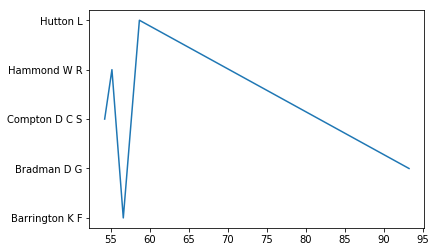

In [235]:
plt.plot(averages[:5],names[:5])

In [237]:
runs_metric = []
player_dict_temp_30 = {}


for i in player_names:
    no_of_matches=0
    runs = 0
    for j in player_dict_temp_2[i]:
        runs += weighted_runs_2[j]
        no_of_matches += (df['Inns'][j] - df['NO'][j])
    if(no_of_matches > 35):    
        runs_metric.append(runs/no_of_matches)
        player_dict_temp_30[i] = (runs/no_of_matches)
    
#print(player_dict_temp_30)
s_45 = [(k,player_dict_temp_30[k]) for k in sorted(player_dict_temp_30, key=player_dict_temp_30.get, reverse = True)]

for k,v in s_45:
    print(k,":",v)
#print(s)

Bradman D G : 93.2639088421
Headley G A : 59.7200159349
Hutton L : 58.6633661758
Barrington K F : 56.5982791692
Hammond W R : 55.1409477402
Compton D C S : 54.2085754725
Sutcliffe H : 54.030704248
Hobbs J B : 53.4765496387
Nourse A D : 53.4391443185
Javed Miandad : 52.9710301774
Smith S P D : 52.9662998621
Pollock R G : 52.6152591221
Weekes E D C : 52.109810826
Lara B C : 51.5691627882
Chappell G S : 51.4803155068
Flower A : 51.4182672672
Sobers G S A : 50.8946594714
Gavaskar S M : 50.6794181561
Richards I V A : 50.0976167728
May P B H : 49.8859435056
Sangakkara K C : 49.8579471665
Kallis J H : 49.6080290732
Hazare V S : 49.3570127783
Hanif Mohammad : 48.6806602663
Walcott C L : 48.4865503166
Chanderpaul S : 48.4611437302
Border A R : 48.3799597677
Amiss D L : 48.2822794554
Mitchell B : 48.038871994
Waugh S R : 48.0035690102
Sutcliffe B : 47.6716366567
Tendulkar S R : 47.6601703589
Richardson R B : 47.3399424284
Shoaib Mohammad : 47.3180863878
Mohammad Yousuf : 47.3029692265
Harvey R N